In [1278]:
# Import libraries:

import pandas as pd
import numpy as np
import re
import datetime as dt

In [1279]:
# Read the csv file:

sharks = pd.read_csv("/Users/miquicampuzano/Documents/Miqui/1. Formación/Ironhack/3. Projects/PR02-project-pandas/attacks.csv", encoding = "latin-1")

In [1280]:
# Extract first 5 rows of data set:

sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [1281]:
# Get general info of the data set:

sharks.info() # We can see that the last 2 columns do not porvide any useful information, we can remove them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [1282]:
# Remove unnecessary columns:

sharks = sharks.drop(["Unnamed: 23", "Unnamed: 22", "href formula", "href", "pdf", "Case Number.1", "Case Number.2", "original order"], axis= 1)

In [1283]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source'],
      dtype='object')

In [1312]:
# Drop rows where these columns are nulls. These are the columns that would allow me n¡to make a meaningful analysisi and not having them it just makes the row useless.:

sharks = sharks.dropna(subset=['Case Number', 'Date', 'Year', 'Type', 'Country', 'Activity', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Species '])

In [1285]:
# Nos deshacemos de los duplicados:

sharks.drop_duplicates(inplace=True)

sharks.drop

<bound method DataFrame.drop of        Case Number         Date    Year        Type     Country  \
0       2018.06.25  25-Jun-2018  2018.0     Boating         USA   
6     2018.06.03.a  03-Jun-2018  2018.0  Unprovoked      BRAZIL   
7       2018.05.27  27-May-2018  2018.0  Unprovoked         USA   
8     2018.05.26.b  26-May-2018  2018.0  Unprovoked         USA   
10      2018.05.24  24-May-2018  2018.0    Provoked   AUSTRALIA   
...            ...          ...     ...         ...         ...   
6239       ND.0068  Before 1962     0.0  Unprovoked  MOZAMBIQUE   
6242       ND.0064        1960s     0.0  Unprovoked        IRAQ   
6243       ND.0063        1960s     0.0  Unprovoked        IRAQ   
6265       ND.0038    1941-1942     0.0  Unprovoked        IRAQ   
6276       ND.0026  Early 1930s     0.0  Unprovoked      BELIZE   

                 Area                                           Location  \
0          California                        Oceanside, San Diego County   
6          

In [1286]:
# Transform date to date time:

# First, we need to tranform string month to int mont. Example: Apr = 04

# We need to perform replacement:

sharks["Date"] = sharks["Date"].fillna("").apply(lambda x: re.sub("Jun","06",x)).apply(lambda x: re.sub("Jan","01",x)).apply(lambda x: re.sub("Feb","02",x)).apply(lambda x: re.sub("Mar","03",x)).apply(lambda x: re.sub("Apr","04",x)).apply(lambda x: re.sub("May","05",x)).apply(lambda x: re.sub("Jul","07",x)).apply(lambda x: re.sub("Aug","08",x)).apply(lambda x: re.sub("Sep","09",x)).apply(lambda x: re.sub("Oct","10",x)).apply(lambda x: re.sub("Nov","11",x)).apply(lambda x: re.sub("Dec","12",x)).apply(lambda x: x.strip())

In [1287]:
# Quitamos todo lo que no sea un número de la columna date:

sharks["Date"] = sharks["Date"].apply(lambda x: re.sub("-", ",", x) if len(x) < 10 else x).apply(lambda x: re.sub("^(\D*)", "",x)).apply(lambda x: re.sub("s", "",x)).apply(lambda x: x.split(",") if "," in x else x).apply(lambda x: str(round(np.average([int(i) for i in x]))) if type(x) == list else x)

In [1288]:
# Eliminamos todo lo que sea una fecha con menos de 4 dígitos y las fechas que tengan mas de 10 dígitos:

sharks["Date"] = sharks["Date"].apply(lambda x: "" if len(x)<4 else x).apply(lambda x: "" if len(x)>10 else x).apply(lambda x: f"01-01 {x}" if len(x) == 4 else x).apply(lambda x: re.sub(" ", "-",x)).apply(lambda x: f"01- {x}" if len(x) == 7 else x).apply(lambda x: "" if len(x) != 10 else x)

In [1289]:
sharks["Date"].value_counts()

              50
27-09-2002     3
31-10-2003     3
28-12-1961     3
09-07-1994     3
              ..
13-08-1989     1
15-08-2007     1
07-05-2003     1
01-05-2014     1
07-12-2011     1
Name: Date, Length: 1728, dtype: int64

In [1290]:
#Transform to date time

sharks["Date"] = pd.to_datetime(sharks["Date"], format = "%d-%M-%Y", errors = "coerce")

# Eliminate hours from date:
sharks["Date"] = sharks["Date"].dt.strftime("%Y-%m-%d")

# Concvertir a Date time otra vez
sharks["Date"] = pd.to_datetime(sharks["Date"])

# Extraemos el año en una nueva columna:

sharks["Year"] = sharks["Date"].dt.year



In [1291]:
# Asignamos index Case Number

sharks.set_index("Case Number")

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
Case Number,,,,,,,,,,,,,,,
2018.06.25,2018-01-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
2018.06.03.a,2018-01-03,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018"
2018.05.27,2018-01-27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com"
2018.05.26.b,2018-01-26,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com"
2018.05.24,2018-01-24,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND.0068,1962-01-01,1962.0,Unprovoked,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,Skindiving,Les Bishop,M,36,Bumped by sharks,N,NaN,"""A pack of sharks""",L. Bishop; V.M. Coppleson (1962)
ND.0064,1960-01-01,1960.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,M,6,Arm severed,N,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan
ND.0063,1960-01-01,1960.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,M,16,Right leg lacerated & surgically amputated,N,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan


In [1292]:
# Now that dates are done, lets check for "Fatal":

sharks["Fatal (Y/N)"].value_counts() # Podemos hacer algo de limpieza

N       1628
Y        296
 N         3
2017       1
M          1
Name: Fatal (Y/N), dtype: int64

In [1293]:
sharks["Fatal (Y/N)"] = sharks["Fatal (Y/N)"].apply(lambda x: "N" if " N" in str(x) else x).apply(lambda x: "UNKNOWN" if x not in ("N","Y") else x)
sharks["Fatal (Y/N)"].value_counts()

N          1631
Y           296
UNKNOWN       2
Name: Fatal (Y/N), dtype: int64

In [1294]:
#Drop de mas columnas que no necesitamos

sharks.drop(["Year", "Fecha_Alberto"], axis = 1, inplace = True)

KeyError: "['Fecha_Alberto'] not found in axis"

In [1295]:
# Analizamos la columna country:

sharks[["Country"]].value_counts()[:100].sort_index(axis = "index")

Country                       
 TONGA                              1
AMERICAN SAMOA                      2
ANDAMAN / NICOBAR ISLANDAS          1
ARGENTINA                           1
ATLANTIC OCEAN                      1
AUSTRALIA                         438
BAHAMAS                            46
BELIZE                              1
BERMUDA                             4
BRAZIL                             26
BRITISH ISLES                       1
BRITISH WEST INDIES                 1
CANADA                              1
CARIBBEAN SEA                       1
CHILE                               1
CHINA                               1
COLUMBIA                            3
COSTA RICA                          3
CROATIA                             6
CUBA                                5
CYPRUS                              1
DOMINICAN REPUBLIC                  1
ECUADOR                             5
EGYPT                              14
EL SALVADOR                         1
ENGLAND            

In [1296]:
# Delete the parenthesis of (UAE):

sharks["Country"] = sharks["Country"].apply(lambda x: re.sub("\(\S+", "", x)).apply(lambda x: x.strip())

In [1297]:
# Analyse "Area":

sharks["Area"].value_counts() #OK

Florida                    404
New South Wales            166
California                 142
Hawaii                     104
Queensland                 102
                          ... 
Attica                       1
Grand Turk Island            1
300 miles east of Luzon      1
300 miles from Antigua       1
Sepang                       1
Name: Area, Length: 278, dtype: int64

In [1298]:
# Analyse Location:

sharks["Location"].value_counts() #OK

New Smyrna Beach, Volusia County    74
Daytona Beach, Volusia County        9
Myrtle Beach, Horry County           8
Nahoon                               7
Florida Keys, Monroe County          7
                                    ..
Tenth Island (King Island)           1
Stockton Beach                       1
Off Fort Pierce, St Lucie County     1
Allan-Pensacola Cay                  1
Battery Beach, Durban                1
Name: Location, Length: 1527, dtype: int64

In [1299]:
sharks["Activity"].value_counts()

Surfing                                         478
Swimming                                        258
Spearfishing                                    163
Fishing                                          78
Wading                                           63
                                               ... 
Wreck / Technical diving                          1
Filming underwater, carrying powerhead            1
Swimming with dolphins                            1
Wading & pushing dinghy toward  the shallows      1
Rowing                                            1
Name: Activity, Length: 479, dtype: int64

In [1300]:
# Analyse Activity. Check if there are some activities that contain numbers, and see if they make sense. They see to make sense:

sharks["check_rare"] = sharks["Activity"].apply(lambda x: re.findall("\d", str(x))).astype(str)

sharks["check_rare"].value_counts()

sharks[sharks["check_rare"] != "[]"]

sharks["Activity"] = sharks["Activity"].apply(lambda x: re.sub("Swimming ", "Swimming", str(x)))


In [1301]:
# Analyse name:

# We will track all cells that have boy, girl, woman, man, male, female on them and write UNKNOWN instead.

def unknown_name(name):
        return re.sub(".*\\bboy\\b.*|.*\\bgirl\\b.*|.*\\bwoman\\b.*|.*\\bman\\b.*|.*\\bmale\\b.*|.*\\bfemale\\b.*", "UNKNOWN", str(name)) 
    
    


sharks["Name"] = sharks["Name"].apply(unknown_name)

sharks["Name"].value_counts()


UNKNOWN                             115
Andre Hartman                         3
Rafael Hermes Thomas                  2
Gary Johnson                          2
Rodney Orr                            2
                                   ... 
A Japanese fisherman from Miyagi      1
Nkosinathi Mayaba                     1
Patape                                1
Stanton Waterman                      1
Guisne Oscoto (Japanese)              1
Name: Name, Length: 1807, dtype: int64

In [1302]:
#Analyse sex:

sharks["Sex "].value_counts() # We can see that we have to do some cleaning

sharks["Sex "] = sharks["Sex "].replace("lli", "M").apply(lambda x: str(x).strip())

sharks["Sex "].value_counts() 

M    1674
F     255
Name: Sex , dtype: int64

In [1303]:
# Analyse Age:

sharks["Age"].value_counts()[:100]

# Strip White spaces

sharks["Age"].apply(lambda x: str(x).strip()).apply(lambda x: re.sub("or|&", ",", x)).apply(lambda x: re.sub("s", "",x)).apply(lambda x: re.sub("teen", "16",x.lower())).apply(lambda x: x.split(",") if "," in x else x)

0               57
6               18
7               52
8               15
10              32
           ...    
6239            36
6242             6
6243            16
6265    [13 ,  14]
6276            16
Name: Age, Length: 1929, dtype: object

In [1304]:
# Clean "Injury"

sharks["Injury"] = sharks["Injury"].apply(lambda x: re.sub("Left foot bitten|Right foot bitten", "Foot bitten", x))

In [1305]:
sharks["Species "] = sharks['Species '].str.findall('((?:\w{3,} )?[s|S]hark)').str.join('').str.lower()

In [1306]:
sharks.drop(["check_rare"], axis = 1, inplace=True)

<AxesSubplot:>

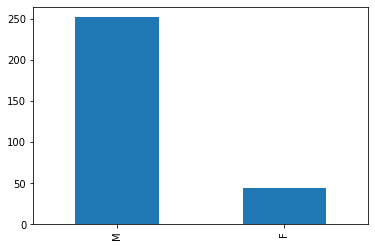

In [1307]:
# Mini analysis:

# Let's see who is more likely to get killed by a shark:

sharks_killed = sharks[sharks["Fatal (Y/N)"] == "Y"]

sharks_killed["Sex "].value_counts() # We see that more males have been killed by sharks

sharks_killed["Sex "].value_counts().plot(kind= "bar")

<AxesSubplot:>

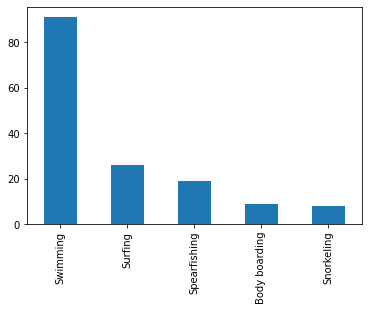

In [1308]:
sharks_killed["Activity"].value_counts().nlargest(5).plot(kind="bar")

<AxesSubplot:>

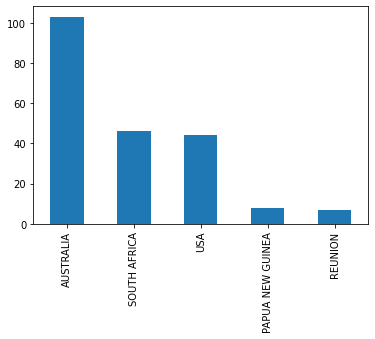

In [1309]:
sharks_killed["Country"].value_counts().nlargest(5).plot(kind="bar")

<AxesSubplot:>

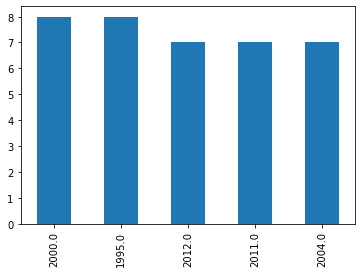

In [1310]:
sharks_killed["Year"].value_counts().nlargest(5).plot(kind="bar")

In [1311]:
#Export CSV:
sharks.to_csv("/Users/miquicampuzano/Documents/Miqui/1. Formación/Ironhack/3. Projects/PR02-project-pandas/cleaned_sharks.csv", sep=",",encoding="latin-1")